In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from sklearn.datasets import load_breast_cancer
cancer_dataset = load_breast_cancer()

In [0]:
cancer_df = pd.DataFrame(np.c_[cancer_dataset['data'],cancer_dataset['target']],
             columns = np.append(cancer_dataset['feature_names'], ['target']))

In [4]:
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [0]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [0]:
X = cancer_df.iloc[:,0:30]

In [7]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [8]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [0]:
y = cancer_df.iloc[:,-1]

In [10]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: target, dtype: float64

In [0]:
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)

In [0]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [0]:
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] 

In [14]:
featureScores

,Specs,Score
0,mean radius,266.104917
1,mean texture,93.897508
2,mean perimeter,2011.102864
3,mean area,53991.655924
4,mean smoothness,0.149899
5,mean compactness,5.403075
6,mean concavity,19.712354
7,mean concave points,10.544035
8,mean symmetry,0.257380
9,mean fractal dimension,0.000074


In [15]:
print(featureScores.nlargest(15,'Score')) 

                   Specs          Score
23            worst area  112598.431564
3              mean area   53991.655924
13            area error    8758.504705
22       worst perimeter    3665.035416
2         mean perimeter    2011.102864
20          worst radius     491.689157
0            mean radius     266.104917
12       perimeter error     250.571896
21         worst texture     174.449400
1           mean texture      93.897508
26       worst concavity      39.516915
10          radius error      34.675247
6         mean concavity      19.712354
25     worst compactness      19.314922
27  worst concave points      13.485419


In [16]:
print(featureScores.nlargest(10,'Score'))

              Specs          Score
23       worst area  112598.431564
3         mean area   53991.655924
13       area error    8758.504705
22  worst perimeter    3665.035416
2    mean perimeter    2011.102864
20     worst radius     491.689157
0       mean radius     266.104917
12  perimeter error     250.571896
21    worst texture     174.449400
1      mean texture      93.897508


In [17]:
["worst area", "mean area", "area error", "worst perimeter", "mean perimeter", "worst radius", "mean radius", "perimeter error" ,"worst texture", "mean texture","worst concavity","radius error","mean concavity","worst compactness","worst concave points"] 

['worst area',
 'mean area',
 'area error',
 'worst perimeter',
 'mean perimeter',
 'worst radius',
 'mean radius',
 'perimeter error',
 'worst texture',
 'mean texture',
 'worst concavity',
 'radius error',
 'mean concavity',
 'worst compactness',
 'worst concave points']

In [18]:
X.head(2)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [0]:
X_new=X[["worst area", "mean area", "area error", "worst perimeter", "mean perimeter", "worst radius", "mean radius", "perimeter error" ,"worst texture", "mean texture","worst concavity","radius error","mean concavity","worst compactness","worst concave points"] ]

In [20]:
X_new.head()

,worst area,mean area,area error,worst perimeter,mean perimeter,worst radius,mean radius,perimeter error,worst texture,mean texture,worst concavity,radius error,mean concavity,worst compactness,worst concave points
0,2019.0,1001.0,153.40,184.60,122.80,25.38,17.99,8.589,17.33,10.38,0.7119,1.0950,0.3001,0.6656,0.2654
1,1956.0,1326.0,74.08,158.80,132.90,24.99,20.57,3.398,23.41,17.77,0.2416,0.5435,0.0869,0.1866,0.1860
2,1709.0,1203.0,94.03,152.50,130.00,23.57,19.69,4.585,25.53,21.25,0.4504,0.7456,0.1974,0.4245,0.2430
3,567.7,386.1,27.23,98.87,77.58,14.91,11.42,3.445,26.50,20.38,0.6869,0.4956,0.2414,0.8663,0.2575
4,1575.0,1297.0,94.44,152.20,135.10,22.54,20.29,5.438,16.67,14.34,0.4000,0.7572,0.1980,0.2050,0.1625


In [21]:
y

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
564    0.0
565    0.0
566    0.0
567    0.0
568    1.0
Name: target, Length: 569, dtype: float64

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.2, random_state= 5)

In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [0]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [25]:
#Implementing SVC() classifier without normalization
from sklearn.svm import SVC                                         
svc_classifier = SVC()
svc_classifier.fit(X_train, y_train)
y_pred_scv = svc_classifier.predict(X_test)
accuracy_score(y_test, y_pred_scv)

0.9298245614035088

In [32]:
#Implementing SVC() classifier with normalization
svc_classifier2 = SVC()                                             
svc_classifier2.fit(X_train_sc, y_train)
y_pred_svc_sc = svc_classifier2.predict(X_test_sc)
accuracy_score(y_test, y_pred_svc_sc)

0.9824561403508771

In [33]:
# Logistic Regression without normalization
from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression(random_state = 51, penalty = 'l2')
lr_classifier.fit(X_train, y_train)
y_pred_lr = lr_classifier.predict(X_test)
accuracy_score(y_test, y_pred_lr)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.9473684210526315

In [34]:
# Logistic Regression with normalization
lr_classifier2 = LogisticRegression(random_state = 51, penalty = 'l2')
lr_classifier2.fit(X_train_sc, y_train)
y_pred_lr_sc = lr_classifier.predict(X_test_sc)
accuracy_score(y_test, y_pred_lr_sc)

0.3684210526315789

In [35]:
# K – Nearest Neighbor Classifier without normalization
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_classifier.fit(X_train, y_train)
y_pred_knn = knn_classifier.predict(X_test)
accuracy_score(y_test, y_pred_knn)

0.9385964912280702

In [36]:
# KNN with normalization
knn_classifier2 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowprint')
y_pred_knn_sc = knn_classifier.predict(X_test_sc)
accuracy_score(y_test, y_pred_knn_sc)

ValueError: ignored

In [37]:
# Naive Bayes Classifier without normalization
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
y_pred_nb = nb_classifier.predict(X_test)
accuracy_score(y_test, y_pred_nb)

0.956140350877193

In [38]:
# With normalization
nb_classifier2 = GaussianNB()
nb_classifier2.fit(X_train_sc, y_train)
y_pred_nb_sc = nb_classifier2.predict(X_test_sc)
accuracy_score(y_test, y_pred_nb_sc)

0.956140350877193

In [39]:
# Decision Tree Classifier without normalization
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 51)
dt_classifier.fit(X_train, y_train)
y_pred_dt = dt_classifier.predict(X_test)
accuracy_score(y_test, y_pred_dt)

0.956140350877193

In [40]:
# Decision Tree Classifier with normalization
dt_classifier2 = DecisionTreeClassifier(criterion = 'entropy', random_state = 51)
dt_classifier2.fit(X_train_sc, y_train)
y_pred_dt_sc = dt_classifier.predict(X_test_sc)
accuracy_score(y_test, y_pred_dt_sc)

0.9298245614035088

In [41]:
# Random Forest Classifier without normalization
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators = 20, criterion = 'entropy', random_state = 51)
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)
accuracy_score(y_test, y_pred_rf)

0.9736842105263158

In [42]:
# Random Forest Classifier with normalization
rf_classifier2 = RandomForestClassifier(n_estimators = 20, criterion = 'entropy', random_state = 51)
rf_classifier2.fit(X_train_sc, y_train)
y_pred_rf_sc = rf_classifier.predict(X_test_sc)
accuracy_score(y_test, y_pred_rf_sc)

0.631578947368421

In [43]:
print(classification_report(y_test, y_pred_svc_sc))

              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98        48
         1.0       0.97      1.00      0.99        66

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



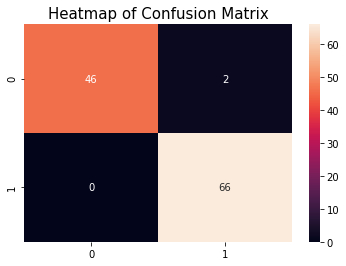

In [44]:
cm = confusion_matrix(y_test, y_pred_svc_sc)
plt.title('Heatmap of Confusion Matrix', fontsize = 15)
sns.heatmap(cm, annot = True)
plt.show()

In [0]:
#Feature Importance

In [46]:
#Using Feature Importance Method
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [47]:
print(model.feature_importances_)

[0.06775521 0.01647342 0.06678119 0.04955832 0.00824445 0.03631016
 0.04714971 0.064376   0.00878989 0.00528497 0.01857802 0.00588391
 0.02643248 0.04670433 0.00659105 0.00745014 0.00997577 0.01070691
 0.00561146 0.00582687 0.087662   0.02475427 0.10593332 0.07357291
 0.02161272 0.02826945 0.03900734 0.08084077 0.01269246 0.0111705 ]


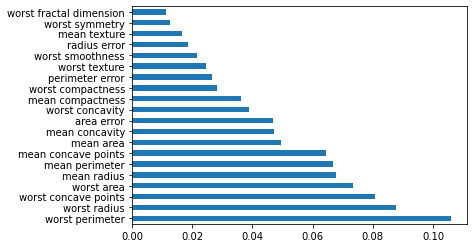

In [48]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [0]:
X_new2=X[["worst area", "mean area", "worst perimeter", "mean perimeter", "worst radius", "mean radius","worst concavity","mean concavity","worst concave points","mean concave points"] ]

In [50]:
X_new2.head()

,worst area,mean area,worst perimeter,mean perimeter,worst radius,mean radius,worst concavity,mean concavity,worst concave points,mean concave points
0,2019.0,1001.0,184.60,122.80,25.38,17.99,0.7119,0.3001,0.2654,0.14710
1,1956.0,1326.0,158.80,132.90,24.99,20.57,0.2416,0.0869,0.1860,0.07017
2,1709.0,1203.0,152.50,130.00,23.57,19.69,0.4504,0.1974,0.2430,0.12790
3,567.7,386.1,98.87,77.58,14.91,11.42,0.6869,0.2414,0.2575,0.10520
4,1575.0,1297.0,152.20,135.10,22.54,20.29,0.4000,0.1980,0.1625,0.10430


In [51]:
y

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
564    0.0
565    0.0
566    0.0
567    0.0
568    1.0
Name: target, Length: 569, dtype: float64

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new2, y, test_size = 0.2, random_state= 5)

In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [54]:
from sklearn.svm import SVC                                         #Implementing SVC() classifier without normalization
svc_classifier = SVC()
svc_classifier.fit(X_train, y_train)
y_pred_scv = svc_classifier.predict(X_test)
accuracy_score(y_test, y_pred_scv)

0.9298245614035088

In [55]:
svc_classifier2 = SVC()                                             #Implementing SVC() classifier with normalization
svc_classifier2.fit(X_train_sc, y_train)
y_pred_svc_sc = svc_classifier2.predict(X_test_sc)
accuracy_score(y_test, y_pred_svc_sc)

0.9736842105263158

In [56]:
# Logistic Regression without normalization
from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression(random_state = 51, penalty = 'l2')
lr_classifier.fit(X_train, y_train)
y_pred_lr = lr_classifier.predict(X_test)
accuracy_score(y_test, y_pred_lr)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.9473684210526315

In [57]:
# Logistic Regression with normalization
lr_classifier2 = LogisticRegression(random_state = 51, penalty = 'l2')
lr_classifier2.fit(X_train_sc, y_train)
y_pred_lr_sc = lr_classifier.predict(X_test_sc)
accuracy_score(y_test, y_pred_lr_sc)

0.5701754385964912

In [58]:
# K – Nearest Neighbor Classifier without normalization
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_classifier.fit(X_train, y_train)
y_pred_knn = knn_classifier.predict(X_test)
accuracy_score(y_test, y_pred_knn)

0.9210526315789473

In [59]:
# KNN with normalization
knn_classifier2 = KNeighborsClassifier(n_neighbors = 5, )
y_pred_knn_sc = knn_classifier.predict(X_test_sc)
accuracy_score(y_test, y_pred_knn_sc)

0.5789473684210527

In [60]:
# Naive Bayes Classifier without normalization
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
y_pred_nb = nb_classifier.predict(X_test)
accuracy_score(y_test, y_pred_nb)

0.9298245614035088

In [61]:
# With normalization
nb_classifier2 = GaussianNB()
nb_classifier2.fit(X_train_sc, y_train)
y_pred_nb_sc = nb_classifier2.predict(X_test_sc)
accuracy_score(y_test, y_pred_nb_sc)

0.956140350877193

In [62]:
# Decision Tree Classifier without normalization
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 51)
dt_classifier.fit(X_train, y_train)
y_pred_dt = dt_classifier.predict(X_test)
accuracy_score(y_test, y_pred_dt)

0.9385964912280702

In [63]:
# Decision Tree Classifier with normalization
dt_classifier2 = DecisionTreeClassifier(criterion = 'entropy', random_state = 51)
dt_classifier2.fit(X_train_sc, y_train)
y_pred_dt_sc = dt_classifier.predict(X_test_sc)
accuracy_score(y_test, y_pred_dt_sc)

0.9298245614035088

In [64]:
# Random Forest Classifier without normalization
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators = 20, criterion = 'entropy', random_state = 51)
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)
accuracy_score(y_test, y_pred_rf)

0.9649122807017544

In [65]:
# Random Forest Classifier with normalization
rf_classifier2 = RandomForestClassifier(n_estimators = 20, criterion = 'entropy', random_state = 51)
rf_classifier2.fit(X_train_sc, y_train)
y_pred_rf_sc = rf_classifier.predict(X_test_sc)
accuracy_score(y_test, y_pred_rf_sc)

0.8859649122807017

In [66]:
print(classification_report(y_test, y_pred_svc_sc))

              precision    recall  f1-score   support

         0.0       1.00      0.94      0.97        48
         1.0       0.96      1.00      0.98        66

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



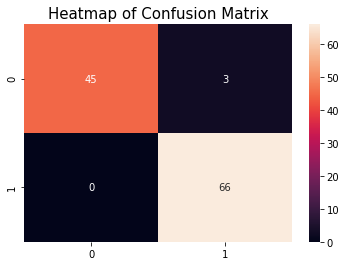

In [67]:
cm = confusion_matrix(y_test, y_pred_svc_sc)
plt.title('Heatmap of Confusion Matrix', fontsize = 15)
sns.heatmap(cm, annot = True)
plt.show()